# Fashion Mnist


In this notebook the goal is to write a CNN that can classify clothing items. Use the code in cifar 10 notebook as a reference to achieve this. The dataset was downloaded from [here](https://github.com/zalandoresearch/fashion-mnist).   You can either create your own architecture and train from scratch, or alternatively you could retrain one of the pretrained models.
If you don't have a GPU, you can try to use a free cloud service that does like [Kaggle](https://www.kaggle.com/kernels) or [Colabratory](https://colab.research.google.com/notebooks/welcome.ipynb#recent=true)

# Image Preperation

Run the bellow cells to read the images into memory.



In [1]:
import os
import gzip
import numpy as np

In [2]:
def load_mnist(path, kind='train'):

    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [3]:
path = 'data/' #change this path to where you kept the data

In [4]:
imgs,labels = load_mnist(path)

In [5]:
labels[0]

9

In [6]:
imgs[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,
         4,   0,   0,   0,   0,   1,   1,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,
        54,   0,   0,   0,   1,   3,   4,   0,   0,   3,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204,
       176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

Reshape the images to be 28 by 28

In [7]:
imgs.shape #number of images, flattened shape

(60000, 784)

In [8]:
imgs=imgs.reshape(60000,28,28,1)
imgs.shape

(60000, 28, 28, 1)

You may wish to plot the images as a sanity check.

# Label Prepration

You need to onehot encode the training labels.

In [9]:
from sklearn.preprocessing import LabelBinarizer
from keras.utils import to_categorical

C:\Users\LH772HBK\Anaconda3\envs\tensorflow\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.
C:\Users\LH772HBK\Anaconda3\envs\tensorflow\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
C:\Users\LH772HBK\Anaconda3\envs\tensorflow\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [10]:
num_classes = 10
label= to_categorical(labels, num_classes)
label

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

lb=LabelBinarizer()
lb
label=lb.fit_transform(labels)
lbl=enc.fit_transform(label)
label

In [11]:
#onehot encode labels here

# Model

In general using more layers can allow you to learn more complex relationships in data however the network will take much longer to train. However more layers doesn't always mean a better model and it can increase your chances of overfitting, to prevent this we often add dropout layers.


In [12]:
from sklearn.model_selection import train_test_split

x= imgs
y= label

train_x, test_x, train_y, test_y = train_test_split( x, y, test_size=0.33)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(40200, 28, 28, 1) (19800, 28, 28, 1) (40200, 10) (19800, 10)


In [13]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, SeparableConv2D
from keras.layers import MaxPooling2D, Dropout, Flatten, ZeroPadding2D

model= Sequential()

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#depthwise convolution
model.add(SeparableConv2D(32,(3,3), padding='same'))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Activation('relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


# Loss function and Compile

Since this is a classication problem we'll need to use catergorical crossentropy for the loss function.  For optimizers there are a lot of choices, a good pick is Adadelta which provides us with an active learning rate.

In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train

Train the model.   Remember to set `model.fit` to a variable since you'll need it later.

```python
history = model.fit(#parameters in here)
```

The history variable will contain the validation and accuracy.

In [19]:
history=model.fit(train_x, train_y,validation_data=(test_x, test_y), 
                  batch_size=100, epochs = 15)

Train on 40200 samples, validate on 19800 samples
Epoch 1/15
40200/40200 [==============================] - 34s 851us/step - loss: 0.2014 - acc: 0.9253 - val_loss: 0.2946 - val_acc: 0.9094
Epoch 2/15
40200/40200 [==============================] - 34s 838us/step - loss: 0.1870 - acc: 0.9300 - val_loss: 0.2853 - val_acc: 0.9025
Epoch 3/15
40200/40200 [==============================] - 46s 1ms/step - loss: 0.1775 - acc: 0.9340 - val_loss: 0.3276 - val_acc: 0.9038
Epoch 4/15
40200/40200 [==============================] - 86s 2ms/step - loss: 0.1680 - acc: 0.9363 - val_loss: 0.3215 - val_acc: 0.9028
Epoch 5/15
40200/40200 [==============================] - 94s 2ms/step - loss: 0.1585 - acc: 0.9410 - val_loss: 0.3315 - val_acc: 0.9044
Epoch 6/15
40200/40200 [==============================] - 94s 2ms/step - loss: 0.1594 - acc: 0.9395 - val_loss: 0.3210 - val_acc: 0.9080
Epoch 7/15
40200/40200 [==============================] - 95s 2ms/step - loss: 0.1508 - acc: 0.9422 - val_loss: 0.3209 - val

In [18]:
model.get_weights()[0]

array([[[[-0.02758242,  0.02752937, -0.20711799,  0.10207662,
           0.04587452, -0.08097839, -0.09898012, -0.13730434,
           0.11411998, -0.15461265,  0.03637661,  0.0611811 ,
           0.15263867,  0.10221289, -0.09111543, -0.00946679,
           0.03737946, -0.10225132, -0.01719439, -0.05437465,
          -0.07209846, -0.07882801,  0.02447329, -0.06044624,
           0.07210245, -0.00302402, -0.08984923, -0.01960103,
          -0.12104663,  0.07729106, -0.02271967,  0.09007352,
          -0.14949565, -0.07406756, -0.04182257, -0.07604052,
           0.06852181, -0.30370814,  0.04342749,  0.0331545 ,
           0.08354557, -0.01600149,  0.02881669,  0.03840074,
          -0.1209956 ,  0.05143006, -0.00284033, -0.14267778,
          -0.04517326, -0.03612984, -0.09572221, -0.06787962,
          -0.03028938, -0.09594385,  0.05446342, -0.04211015,
          -0.15167199,  0.06148753, -0.0319591 , -0.2804451 ,
           0.03636916,  0.0130273 , -0.04104482, -0.06842981]],

     

model.save_weights('Fashion_MNISTw1.h5')

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 7, 7, 32)          1344      
__________

In [ ]:
# Fit model

# Plotting

After you've trained the model it's good practive to plot the validation loss and accuracy, from this we can see if any over fitting is occuring.



In [24]:
score = model.evaluate(test_x, test_y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4182373349805071
Test accuracy: 0.9056565656806483


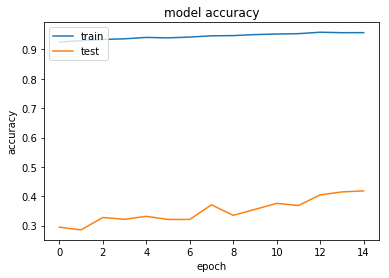

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

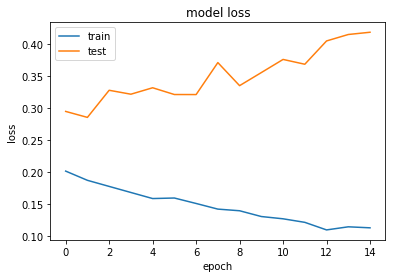

In [26]:
#summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
# Plot accuracy and validation

# Prediction

Use you newly trained model to predict the class of the clothing, what's the accuracy rate? 

In [27]:
from keras.models import load_model

model.save('Fashion-MNIST.h5')  # creates a HDF5 file 'my_model.h5'
del model

In [28]:
model = load_model('Fashion-MNIST.h5')

preds  = model.predict(test_x)
np.argmax(preds,axis=0)

array([  8,  11, 530,  25, 105,  16,  68,   6,   4,   7], dtype=int64)

In [ ]:
# Final prediction